DiGraph with 12 nodes and 16 edges


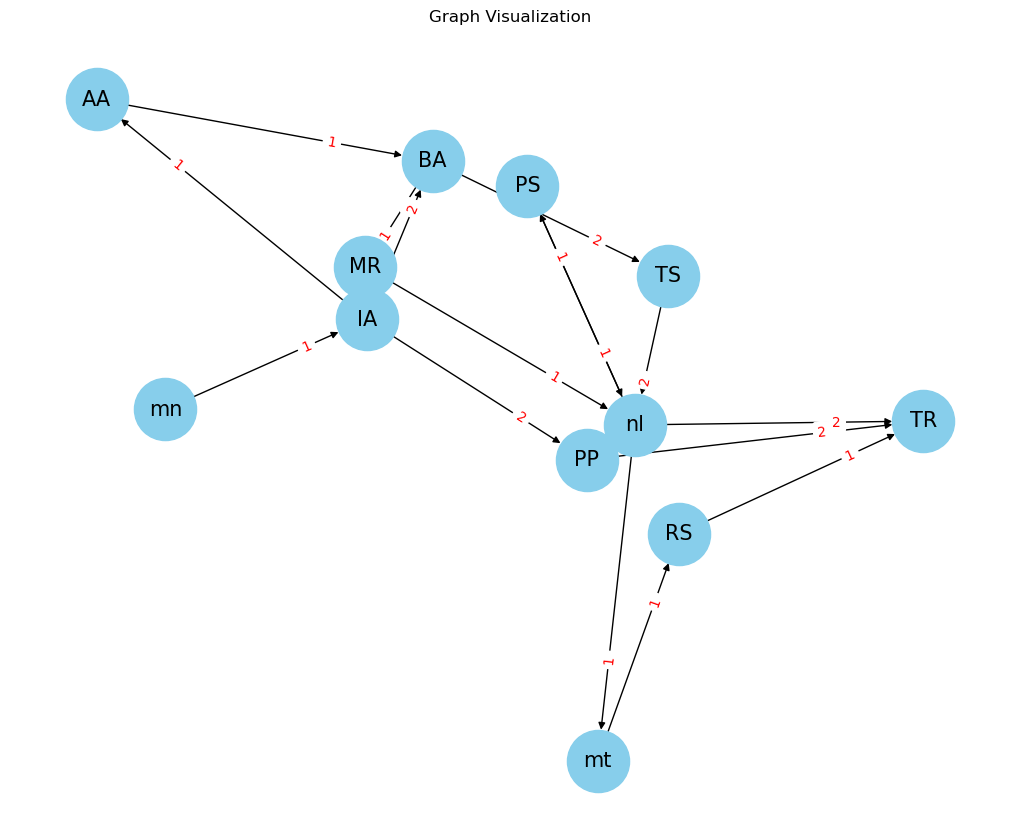

In [26]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

input_strings = [
    "IA PP TR",
    "IA BA TS nl TR",
    "IA BA TS nl PS nl mt RS TR",
    "IA AA BA MR nl TR",
    "mn IA PP TR"
]

graph = defaultdict(lambda: defaultdict(int))
for input_string in input_strings:
    nodes = input_string.split()
    for i in range(len(nodes) - 1):
        graph[nodes[i]][nodes[i + 1]] += 1

G = nx.DiGraph()
for source, targets in graph.items():
    for target, weight in targets.items():
        G.add_edge(source, target, weight=weight)
print(G)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, label_pos=0.3, font_color='red')
plt.title("Graph Visualization")
plt.axis('off')
plt.show()


In [1]:
# import data from the csv file  F:\university\UIUC\24SPRING\datathon\file_3_Mar18_Output_1.csv 
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:

# data = pd.read_csv('F:/university/UIUC/24SPRING/datathon/file_3_Mar18_Output_1.csv')
data = pd.read_csv('F:/university/UIUC/24SPRING/datathon/3_clean.csv')


In [3]:
data_test = data[:1000]

In [14]:
mos = data_test["mos"].tolist()
graph = defaultdict(lambda: defaultdict(int))
for input_string in mos:
    nodes = input_string.split()
    for i in range(len(nodes) - 1):
        graph[nodes[i]][nodes[i + 1]] += 1

from pyvis.network import Network
import networkx as nx

weights = [edge['weight'] for edge in G.edges(data=True)]
G = nx.DiGraph()
for source, targets in graph.items():
    for target, weight in targets.items():
        G.add_edge(source, target, weight=weight)

net = Network(notebook=False)
net.from_nx(G)

min_weight = min([edge['width'] for edge in net.edges])
max_weight = max([edge['width'] for edge in net.edges])


# Assuming you want to map the weights to shades of blue
def get_color(weight, min_weight, max_weight):
    # Normalize weight to a value between 0 and 1
    normalized_weight = (weight - min_weight) / (max_weight - min_weight)
    # Convert to a color scale (0-255), with 255 being the lightest and 0 the darkest
    # Here we invert it because we want darker colors for higher weights
    color_scale = int(255 * (1 - normalized_weight))
    # Format as a hex color code, ensuring it has 2 hex digits
    hex_color = format(255 - color_scale, '02x')
    # Return as a hex color string, using a shade of blue (hex_color can also be applied to red (R) and green (G) for different colors)
    return f'#{hex_color}{hex_color}ff'

# Loop through each edge to set its color based on its weight
for edge in net.edges:
    weight = edge['width']
    # color = get_color(weight, min_weight, max_weight)
    # edge['color'] = color
    # You might want to scale the width based on weight too, or set it to a fixed value as you did
    # edge['width'] = 2  # Or scale based on weight if desired
    # threshold = 0.1
    # print(weight, threshold * max_weight)
    # if weight > threshold * max_weight:
    #     edge['width'] = 10
    # else:
    #     edge['width'] = 0
    # if weight is bigger than the first inquartile, then the width is 10, else the width is 0
    if weight > np.percentile(weights, 25):
        edge['width'] = 10
    else:
        edge['width'] = 0

net.toggle_physics(True)
net.set_options("""
var options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -80000,
      "centralGravity": 0.3,
      "springLength": 95,
      "springConstant": 0.04,
      "damping": 0.09,
      "avoidOverlap": 0
    },
    "minVelocity": 0.75
  }
}
""")


net.save_graph('interactive_graph.html')

TypeError: tuple indices must be integers or slices, not str